## R12725049 Assignment2

### 1(a.) 試簡述何謂維度的詛咒？試列舉一案例說明。

- 隨著函數（或模型）所需要估計未知參數的增加，樣本所需要的數量會呈現指數型的成長，樣本數不足的情況容易發生不易收斂或多重解的可能性
- 如影像處理即可能面臨維度詛咒。一個800*600的彩色照片代表有1440000個變數。

### 1(b.) 避免維度詛咒的方法有哪些？

- 降低維度
- 在給定誤差的情況下滿足最少需要的樣本數
- 僅留下需要的Feature
- Clustering

### 1(c.)，試著重新繪製圖 3.12，呈現維度與預測

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

df_winequality = pd.read_excel(r"./MDS_Assignment1_winequality.xlsx")

In [2]:
# 刪除重複值
df_winequality.drop_duplicates(inplace=True)

In [3]:
X_winequality = df_winequality.drop(columns=["quality"], axis=1) # 特徵
Y_winequality = df_winequality["quality"]# 標籤

In [4]:
import statsmodels.api as sm

X_winequality = sm.add_constant(X_winequality)

# 建立OLS model
model = sm.OLS(Y_winequality, X_winequality).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.364
Model:                            OLS   Adj. R-squared:                  0.359
Method:                 Least Squares   F-statistic:                     70.02
Date:                Thu, 26 Oct 2023   Prob (F-statistic):          5.83e-124
Time:                        20:03:15   Log-Likelihood:                -1356.8
No. Observations:                1359   AIC:                             2738.
Df Residuals:                    1347   BIC:                             2800.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   13.2379 

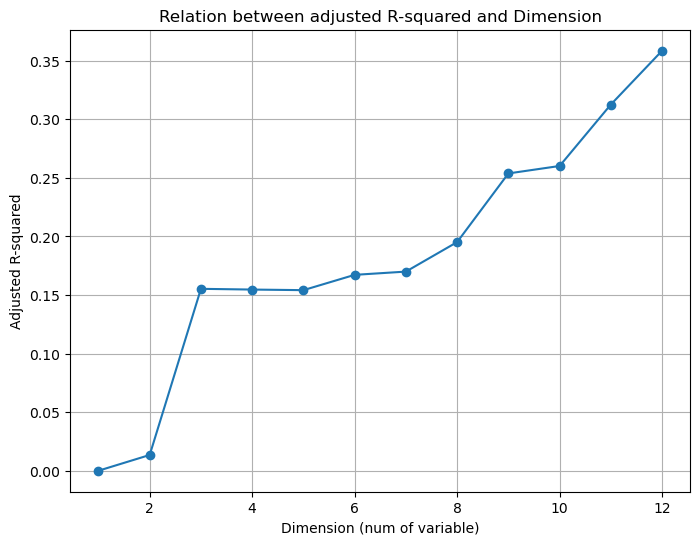

In [5]:
# Initial
num_variables = []  
adjusted_r_squared = []  

# 逐步增加變數個數
for num_vars in range(1, len(X_winequality.columns) + 1):
    
    selected_vars = X_winequality.iloc[:, :num_vars]
    selected_vars = sm.add_constant(selected_vars)

    # 建立OLS模型
    model = sm.OLS(Y_winequality, selected_vars).fit()

    # adjusted R-squared
    adj_r_squared = model.rsquared_adj

    # Record
    num_variables.append(num_vars)
    adjusted_r_squared.append(adj_r_squared)

# 繪圖
plt.figure(figsize=(8, 6))
plt.plot(num_variables, adjusted_r_squared, marker='o', linestyle='-')
plt.title("Relation between adjusted R-squared and Dimension")
plt.xlabel("Dimension (num of variable)")
plt.ylabel("Adjusted R-squared")
plt.grid(True)
plt.show()

### 1(d.)若準確度有或沒有明顯下降，請試著說明為什麼？

沒有明顯下降，應為維度還不夠多而數據量足夠龐大，導致還沒有達到最適特徵數量的頂峰

### 2(a.) 試說明損失函數與模型評估指標有何不同？

#### 模型訓練時使用損失函數，模型訓練後使用評估指標
- 損失函數
    - 訓練與配適模型時最小化的目標函數，作為調整模型複雜度與權衡偏誤與變異
    - 其函數特性常需要滿足一定的要求，例如具備「微分特性」、「連續性」等性質。通常只能比較相對性，無法解釋絕對的誤差大小
- 評估指標
    - 用以衡量訓練後的模型表現，評估最終結果，需具備「公平性」與「比較性」

### 2(b.)試使用網際網路(internet)學習，損失函數的設計有哪些？試列舉兩種，並說明其各自的優缺點或可建議的使用時機。

MSE與Log Loss是兩種常見的Loss Funtion
- MSE：常用於Linear Regression的問題上
    - 優點：相對容易理解和計算，因為它具有可微分的圖形。
    - 缺點：對異常值不敏感，若誤差小於一，可能低估模型的不良程度。
- Log Loss：常用於Logistic Regression的問題上
    - 優點：非常適用於大量觀測數據，當觀測數量達到數千以上時，表現非常出色。
    - 缺點：不像MSE那樣容易解釋和計算，尤其在多分類問題中，且對異常值敏感。

### 2(c.)如何根據不同情況選擇損失函數？試舉例或用開放數據說明之。

#### 根據上述可得知若我們知道我們所選擇的迴歸方法為何，可以根據迴歸方法來選擇不同的損失函數，處理Linear Regression的問題便會使用MSE，而處理Logistic Regression的問題則較常使用Log Loss

### 3(a) 根據此開放數據，您會用什麼方法來確認資料品質的好壞？試操作一次並說明其細節。

In [6]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

In [7]:
# 使用Pandas的read_excel函數讀取檔案
# 因沒有表頭所以先加入虛擬表頭
file_path = r"./MDS_Assignment2_kidney.xlsx"
df_kidney = pd.read_excel(file_path,sheet_name=0,header=None)
df_kidney

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.02,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.02,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [8]:
# 使用Pandas的read_excel函數讀取第二個Sheet做為表頭
df = pd.read_excel(file_path,sheet_name=1,usecols="D",header=None)
new_df = df[31:56]
new_df

,3
31,age
32,bp
33,sg
34,al
35,su
36,rbc
37,pc
38,pcc
39,ba
40,bgr


In [9]:
df_kidney.columns = new_df.T.values[0]

In [10]:
# 查看資料及概況
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     400 non-null    object
 1   bp      400 non-null    object
 2   sg      400 non-null    object
 3   al      400 non-null    object
 4   su      400 non-null    object
 5   rbc     400 non-null    object
 6   pc      400 non-null    object
 7   pcc     400 non-null    object
 8   ba      400 non-null    object
 9   bgr     400 non-null    object
 10  bu      400 non-null    object
 11  sc      400 non-null    object
 12  sod     400 non-null    object
 13  pot     400 non-null    object
 14  hemo    400 non-null    object
 15  pcv     398 non-null    object
 16  wc      395 non-null    object
 17  rc      394 non-null    object
 18  htn     394 non-null    object
 19  dm      389 non-null    object
 20  cad     387 non-null    object
 21  appet   387 non-null    object
 22  pe      387 non-null    ob

**上述可看出每列的Data Type不盡正確**

In [11]:
# 查看資料內有多少空值與問號值
df_kidney.replace('?', np.nan, inplace=True)
df_kidney.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       72
wc       109
rc       134
htn        8
dm        13
cad       15
appet     14
pe        14
ane       14
class     13
dtype: int64

**上述檢查數據完整性，可看出幾乎每列都有空值，完整性不佳**

In [12]:
# cat to num:
columnsname=df_kidney.columns
# len(columnsname)
for i in range (0,25):
    print(columnsname[i],df_kidney[columnsname[i]].unique())

age [48.  7. 62. 51. 60. 68. 24. 52. 53. 50. 63. 40. 47. 61. 21. 42. 75. 69.
 nan 73. 70. 65. 76. 72. 82. 46. 45. 35. 54. 11. 59. 67. 15. 55. 44. 26.
 64. 56.  5. 74. 38. 58. 71. 34. 17. 12. 43. 41. 57.  8. 39. 66. 81. 14.
 27. 83. 30.  4.  3.  6. 32. 80. 49. 90. 78. 19.  2. 33. 36. 37. 23. 25.
 20. 29. 28. 22. 79.]
bp [ 80.  50.  70.  90.  nan 100.  60. 110. 140. 180. 120.]
sg [1.02  1.01  1.005 1.015   nan 1.025]
al [ 1.  4.  2.  3.  0. nan  5.]
su [ 0.  3.  4.  1. nan  2.  5.]
rbc [nan 'normal' 'abnormal']
pc ['normal' 'abnormal' nan]
pcc ['notpresent' 'present' nan]
ba ['notpresent' 'present' nan]
bgr [121.  nan 423. 117. 106.  74. 100. 410. 138.  70. 490. 380. 208.  98.
 157.  76.  99. 114. 263. 173.  95. 108. 156. 264. 123.  93. 107. 159.
 140. 171. 270.  92. 137. 204.  79. 207. 124. 144.  91. 162. 246. 253.
 141. 182.  86. 150. 146. 425. 112. 250. 360. 163. 129. 133. 102. 158.
 165. 132. 104. 127. 415. 169. 251. 109. 280. 210. 219. 295.  94. 172.
 101. 298. 153.  88. 226. 143. 1

In [13]:
df_kidney['dm'] = df_kidney['dm'].replace(to_replace={' yes':'yes'})

**上述檢查每個欄位的獨特質是否有不合理的值出現，發現確實有出現如' yes'**

In [14]:
# 將欄位分為numerical以及categorical以便後續處理
columns = df_kidney.columns
columns_numerical = ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
columns_categorical = ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
columns_ordinal = ['sg', 'al', 'su']

# Change Data Type
df_kidney[columns_numerical] = df_kidney[columns_numerical].apply(pd.to_numeric, errors='coerce')

In [15]:
df_kidney.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,328.000000,291.000000,266.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.871951,8425.773196,4.695865
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,9.000955,2949.586003,1.009624
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,6.500000


**上述檢查數據準確性、一致性，可看出某些數值有明顯的outliers**

In [16]:
# 查看資料及概況
df_kidney.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     391 non-null    float64
 1   bp      388 non-null    float64
 2   sg      353 non-null    float64
 3   al      354 non-null    float64
 4   su      351 non-null    float64
 5   rbc     248 non-null    object 
 6   pc      335 non-null    object 
 7   pcc     396 non-null    object 
 8   ba      396 non-null    object 
 9   bgr     356 non-null    float64
 10  bu      381 non-null    float64
 11  sc      383 non-null    float64
 12  sod     313 non-null    float64
 13  pot     312 non-null    float64
 14  hemo    348 non-null    float64
 15  pcv     328 non-null    float64
 16  wc      291 non-null    float64
 17  rc      266 non-null    float64
 18  htn     392 non-null    object 
 19  dm      387 non-null    object 
 20  cad     385 non-null    object 
 21  appet   386 non-null    object 
 22  pe

### 3(b)試建議三個可能衡量數據品質的量化指標(i.e. KPIs)

1. Error Rate：數據中錯誤值的比例，用以衡量Data Accuracy
2. Missing Value Ratio：數值中遺漏值的百分比，用以衡量Data Completeness
3. Duplicate Data Ratio：數值中重複資料的比例，用以衡量Data Consistency

### 3(c)如何處理遺漏值(missing values)？又或某些欄位不打算遺漏值處理的理由為何？

- Classification為空值的數據直接drop，因其就是我們需要分析的結果數據
- 類別欄位利用Encoder直接做編碼沒有填值
- 數值欄位則以MICE找到最適值填入

> 此處不先填補名目尺度的空值是因為尚未轉換數據只能用較差的方式如most_frequency來填補，會造成資料失真，因此保留有空值的特性直接轉換數據後，在用MICE演算法填補數值欄位

In [17]:
print("Atribut Numerical: {}".format(columns_numerical))
print("Atribut Categorical: {}".format(columns_categorical))
print("Panjang Atribut Numerical dan Categorical: {}".format(len(columns_numerical)+len(columns_categorical)))

Atribut Numerical: ['age', 'bp', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc']
Atribut Categorical: ['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane', 'class']
Panjang Atribut Numerical dan Categorical: 22


In [18]:
# change df classficication to 0 and 1
df_kidney['class'] = df_kidney['class'].replace(to_replace={'ckd':1, 'notckd':0})

# Drop classification為空值的數據
df_kidney = df_kidney.dropna(subset=["class"])

In [19]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# 1. 用LabelEncoder轉換columns_categorical的數據
label_encoder = LabelEncoder()
df_kidney[columns_categorical] = df_kidney[columns_categorical].apply(label_encoder.fit_transform)

# 2. 用OneHot Encoding轉換columns_ordinal的數據
df_kidney = pd.get_dummies(df_kidney, columns=columns_ordinal)


# 3. 用MICE填補空值
imputer = IterativeImputer(max_iter=10, random_state=0)
df_kidney[columns_numerical] = imputer.fit_transform(df_kidney[columns_numerical])

display(df_kidney)

C:\Users\tiger\AppData\Local\Temp\ipykernel_25308\4059089113.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_kidney[columns_categorical] = df_kidney[columns_categorical].apply(label_encoder.fit_transform)


,age,bp,rbc,pc,pcc,ba,bgr,bu,sc,sod,...,al_2.0,al_3.0,al_4.0,al_5.0,su_0.0,su_1.0,su_2.0,su_3.0,su_4.0,su_5.0
0,48.0,80.0,2,1,0,0,121.000000,36.0,1.2,140.962176,...,0,0,0,0,1,0,0,0,0,0
1,7.0,50.0,2,1,0,0,99.433814,18.0,0.8,136.108330,...,0,0,1,0,1,0,0,0,0,0
2,62.0,80.0,1,1,0,0,423.000000,53.0,1.8,131.682078,...,1,0,0,0,0,0,0,1,0,0
3,48.0,70.0,1,0,1,0,117.000000,56.0,3.8,111.000000,...,0,0,1,0,1,0,0,0,0,0
4,51.0,80.0,1,1,0,0,106.000000,26.0,1.4,137.657164,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,1,1,0,0,140.000000,49.0,0.5,150.000000,...,0,0,0,0,1,0,0,0,0,0
396,42.0,70.0,1,1,0,0,75.000000,31.0,1.2,141.000000,...,0,0,0,0,1,0,0,0,0,0
397,12.0,80.0,1,1,0,0,100.000000,26.0,0.6,137.000000,...,0,0,0,0,1,0,0,0,0,0
398,17.0,60.0,1,1,0,0,114.000000,50.0,1.0,135.000000,...,0,0,0,0,1,0,0,0,0,0


In [21]:
df_kidney.isnull().sum()

age         0
bp          0
rbc         0
pc          0
pcc         0
ba          0
bgr         0
bu          0
sc          0
sod         0
pot         0
hemo        0
pcv         0
wc          0
rc          0
htn         0
dm          0
cad         0
appet       0
pe          0
ane         0
class       0
sg_1.005    0
sg_1.01     0
sg_1.015    0
sg_1.02     0
sg_1.025    0
al_0.0      0
al_1.0      0
al_2.0      0
al_3.0      0
al_4.0      0
al_5.0      0
su_0.0      0
su_1.0      0
su_2.0      0
su_3.0      0
su_4.0      0
su_5.0      0
dtype: int64

### 4(a.) 若要建構線性迴歸或羅吉斯迴歸分析，如何處理某些類別或名目尺度的欄位？

#### 在3(c.)的程式碼中已對類別或名目尺度的欄位做處理，將字串轉為1/0的編碼來表示，而名目尺度則是利用One hot encoding的方式處理

### 4(b) 試將羅吉斯迴歸分析的結果呈現如下表，並試著解釋任一特徵與目標值之間的關係。

#### 因持續遇到共線性問題，透過網路學習得知，刪除VIF值高的欄位有助於羅吉斯迴歸分析的進行，因此刪除相關的欄位。

In [37]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# 計算VIF
def calculate_vif(data):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = data.columns
    vif_data["VIF"] = [variance_inflation_factor(data.values, i) for i in range(data.shape[1])]
    return vif_data

vif = calculate_vif(df_kidney.drop(columns=['class']))

print(vif)

    Variable         VIF
0        age   14.454807
1         bp   40.390823
2        rbc    7.805106
3         pc   10.092489
4        pcc    2.179937
5         ba    1.779599
6        bgr    9.952760
7         bu    7.785857
8         sc    3.154573
9        sod  196.066922
10       pot    5.389070
11      hemo  156.926002
12       pcv  143.107001
13        wc   14.473175
14        rc  114.880172
15       htn    4.064595
16        dm    3.715487
17       cad    1.536258
18     appet    1.917644
19        pe    2.054033
20       ane    1.903481
21  sg_1.005    2.641635
22   sg_1.01   20.589852
23  sg_1.015   19.194604
24   sg_1.02   27.908558
25  sg_1.025   22.356969
26    al_0.0  127.550389
27    al_1.0   26.735786
28    al_2.0   24.807193
29    al_3.0   26.795322
30    al_4.0   14.450423
31    al_5.0    1.846612
32    su_0.0  179.755806
33    su_1.0    9.218592
34    su_2.0   12.211098
35    su_3.0    9.981434
36    su_4.0    9.151887
37    su_5.0    3.011275


In [39]:
# 找出VIF超過20的值
high_vif_variables = vif[vif['VIF'] > 20]

print("Variables with VIF > 20:")
print(high_vif_variables)

# 刪除高VIF的欄位
X_filtered = df_kidney.drop(columns=high_vif_variables["Variable"])

Variables with VIF > 20:
    Variable         VIF
1         bp   40.390823
9        sod  196.066922
11      hemo  156.926002
12       pcv  143.107001
14        rc  114.880172
22   sg_1.01   20.589852
24   sg_1.02   27.908558
25  sg_1.025   22.356969
26    al_0.0  127.550389
27    al_1.0   26.735786
28    al_2.0   24.807193
29    al_3.0   26.795322
32    su_0.0  179.755806


In [23]:
X_filtered = df_kidney.drop(columns=high_vif_variables["Variable"])
X_filtered = X_filtered.drop(columns=['class'])
# 添加截距intercept
X_filtered = sm.add_constant(X_filtered)
y = df_kidney["class"]

# 使用Logit進行迴歸
model_filtered = sm.Logit(y, X_filtered)
result_filtered = model_filtered.fit(method='bfgs')

summary_filtered = result_filtered.summary()

# Print report
print(summary_filtered)

         Current function value: 0.125058
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 40
                           Logit Regression Results                           
Dep. Variable:                  class   No. Observations:                  387
Model:                          Logit   Df Residuals:                      361
Method:                           MLE   Df Model:                           25
Date:                Thu, 26 Oct 2023   Pseudo R-squ.:                  0.8127
Time:                        20:03:16   Log-Likelihood:                -48.398
converged:                      False   LL-Null:                       -258.38
Covariance Type:            nonrobust   LLR p-value:                 2.495e-73
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.7106      2.176     -1.705      0.088      -7.975       0.5

C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2383: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\discrete\discrete_model.py:2441: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q * linpred)))
C:\Users\tiger\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


### 4(c.) 基於上述(b)的結果，將上述特徵以 t value 進行排序後，哪些特徵的迴歸係數在統計上是顯著的呢(p-value<0.01)？

In [36]:
# p value
p_values = result_filtered.pvalues

# sort p value，and get features name
sorted_p_values = p_values.abs().sort_values()

print(sorted_p_values)

pot         0.000032
rbc         0.000369
sc          0.000807
bgr         0.002215
pc          0.002750
cad         0.048624
dm          0.053097
sg_1.015    0.053365
age         0.063288
const       0.088116
htn         0.117171
pe          0.140345
appet       0.179221
al_4.0      0.342741
su_3.0      0.454131
bu          0.611398
sg_1.005    0.742353
pcc         0.744421
wc          0.812627
ane         0.856335
su_2.0      0.856428
su_4.0      0.967074
ba          0.969051
su_1.0      0.988188
su_5.0      0.999862
al_5.0      1.000000
dtype: float64


#### 在此可看出統計特徵值為potassium、red blood cells、serum creatinine、blood glucose random、pus cell、coronary artery disease

### 4(d.)試問配適羅吉斯迴歸模型是否合適？試若配適不佳，試說明其可能的原因為何？

Intercept (截距): [-0.3825724]
age: -0.00926507010620727
rbc: 0.3216248324192065
pc: -0.5953430835165601
pcc: 0.16787026130299515
ba: 0.035437145510962664
bgr: 0.025291868070712466
bu: -0.0005851880021519579
sc: 2.6008597713601787
pot: -1.9312962505136126
wc: 0.00020244038534057777
htn: 0.8014678177330969
dm: 0.6763546478551712
cad: 0.0973428100343394
appet: 0.47654424771062315
pe: 0.4311875688925689
ane: 0.196220810256193
class: 1.8004709683640925
sg_1.005: 0.0510033526994185
sg_1.015: 0.6153051568963701
al_4.0: 0.1652685010046211
al_5.0: 3.189115377485407e-05
su_1.0: 0.0646330897809751
su_2.0: 0.08440329618672703
su_3.0: 0.0543465487585681
su_4.0: 0.019602024096714268
su_5.0: 0.010503747800943817
test accuracy 0.9743589743589743


C:\Users\tiger\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


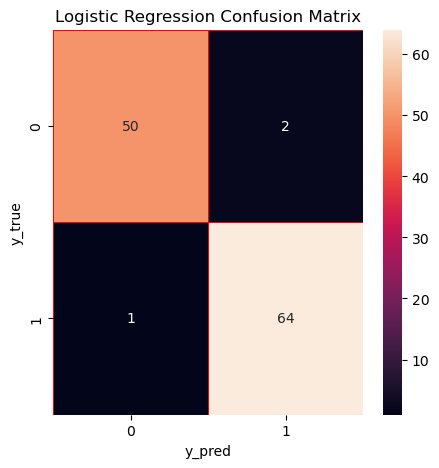

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# 分為訓練集與測試集
x_train,x_test,y_train,y_test=train_test_split(X_filtered,y,random_state=1,test_size=0.3)

lr = LogisticRegression()
lr.fit(x_train,y_train)

# Get coefficients
coefficients = lr.coef_[0]
intercept = lr.intercept_

# Print Intercept
print("Intercept (截距):", intercept)
for feature, coef in zip(X_filtered.columns, coefficients):
    print(f"{feature}: {coef}")

score = lr.score(x_test,y_test)*100
# algorithms.append("Logistic Regression")
print("test accuracy {}".format(lr.score(x_test,y_test)))

#Confusion Matrix
from sklearn.metrics import confusion_matrix
y_pred=lr.predict(x_test)
y_true=y_test
cm=confusion_matrix(y_true,y_pred)

#Confusion Matrix on Heatmap
f,ax=plt.subplots(figsize=(5,5))
sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("y_pred")
plt.ylabel("y_true")
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#### Psedo R-squre 為0.81，是接近1的值，因此對於數據的解釋程度佳，利用羅吉斯模型配飾是合適的，且做預測時Accuracy也達到0.97

### 4(e.)試問配適線性判別分析模型是否合適？若配適不佳，試說明其可能的原因為何？

In [32]:
# OLS
model = sm.OLS(y, X_filtered)
result = model.fit()

summary = result.summary()

print(summary)

                            OLS Regression Results                            
Dep. Variable:                  class   R-squared:                       0.597
Model:                            OLS   Adj. R-squared:                  0.569
Method:                 Least Squares   F-statistic:                     21.36
Date:                Thu, 26 Oct 2023   Prob (F-statistic):           1.80e-56
Time:                        20:05:57   Log-Likelihood:                -95.178
No. Observations:                 387   AIC:                             242.4
Df Residuals:                     361   BIC:                             345.3
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0863      0.099     -0.871      0.3

#### R-squred與Adj. R-squared數值皆不到0.6，配適結果沒有羅吉斯回歸佳，我認為可能原因為我們的目標特徵值適0/1的特徵值(Classification)，本來就較為適合羅吉斯回歸

In [41]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# 分為訓練集與測試集
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, random_state=42)

# 利用QDA模型做二次判別分析
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)

y_pred = qda.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        29
           1       1.00      1.00      1.00        49

    accuracy                           1.00        78
   macro avg       1.00      1.00      1.00        78
weighted avg       1.00      1.00      1.00        78



C:\Users\tiger\anaconda3\Lib\site-packages\sklearn\discriminant_analysis.py:935: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


#### 從Classification Report的數據中可看出配適效果佳

---
## Reference

- https://www.kaggle.com/code/mohannapd/99-accuracy-for-ckd-prediction/comments
- https://www.kaggle.com/code/yudhaislamisulistya/kidney-disease-knn-nbc-dt
- https://www.kaggle.com/code/prashant111/logistic-regression-classifier-tutorial
- https://blog.csdn.net/chenlei456/article/details/123581243
- https://www.cupoy.com/qa/club/ai_tw/0000016D6BA22D97000000016375706F795F72656C656173654B5741535354434C5542/0000017C558AF365000000036375706F795F72656C656173655155455354
- 課堂講義